<a href="https://colab.research.google.com/github/gatofeles/Trabalhos-SI202/blob/master/gameShisima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shisima**

##**O tabuleiro**

O tabuleiro deste jogo é um octágono em que os vértices opostos são interligados por linhas diagonais. Não é possível aumentar o tabuleiro deste jogo pois o único resultado disto seria o prolongamento da partida e não haveria nenhum desafio extra para estratégias. A imagem abaixo ilustra o tabuleiro.

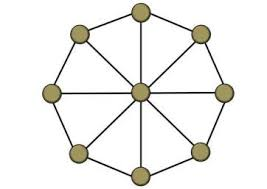

##**Regras do Jogo**

**Movimentação das peças**

Neste jogo, o posicionamento das peças é limitado aos vértices de um octágono sendo que a movimentação acontece a partir das arestas e das linhas que interligam cada vértice oposto. Também é possível posicionar as peças no centro do octágono. A imagem abaixo ilustra o tabuleiro e os possíveis posicionamentos das peças. Em cada turno um jogador realiza um movimento, sendo possível mover a peça para um ponto adjacente. Não há possibilidade de pular casas ou jogadas consecutivas.

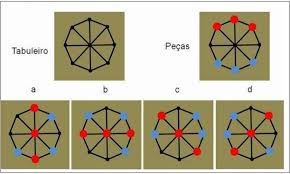

**Condições de Vitória**

Ganha o jogo o jogador que conseguir colocar três peças da mesma cor em uma fileira, como indicado nas figuras b e c na imagem abaixo. Caso a mesma jogada seja repetida 3 vezes durante o jogo, o jogo termina em empate.


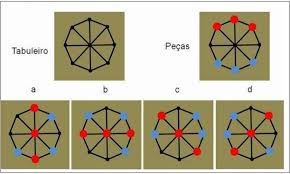

###Reperesentação do tabuleiro
Jogadores com peças brancas são representados por 1 e jogadores com peças pretas são representados por -1. Os pontoa vagos são representados por 0 e o tabuleiro possui 9 espaços.



In [ ]:
import random
emptyBoard = (0,0,0,0,0,0,0,0,0)
initialBoard = (1,1,0,-1,-1,-1,0,1,0)

bugBoard1 = (0, 0, 1, 0, 1, -1, -1, -1, 1)
bugBoard2 = (0, 1, 1, 1, -1, 0, -1, 0, -1)

###Vencedor
Vence o jogador que obtiver a combinação de peças posição n, posição n+4 e posição 9 (centro).

In [ ]:
def winner(board):

  whiteList = []
  blackList = []

  for i in range(9):
    if board[i] == 1:
      whiteList.append(i)
    elif board[i] == -1:
      blackList.append(i)
  
  if whiteList[2] == 8 and whiteList[0] == (whiteList[1] - 4):
    return True, 1

  elif blackList[2] == 8 and blackList[0] == (blackList[1] - 4):
    return True, -1

  else:
    return False, 0

In [ ]:
winner((0, 0, 1, 0, 1, -1, -1, -1, 1))

(False, 0)

###Jogadas válidas
Jogadas válidas são aquelas de campos adjacentes desocupados.

In [ ]:
def validMoves(board):

  validWhite = []
  validBlack = []

  for i in range(len(board)):

    validTempWhite = []
    validTempBlack = []

################################################################################
#
#Verificando Jogadas válidas das peças brancas
#
################################################################################

### Caso 0
    if board[i] == 1 and i == 0:
      validTempWhite.append(i)

      if board[7] == 0:
        validTempWhite.append(7)
      else:
        validTempWhite.append(False)

      if board[1] == 0:
        validTempWhite.append(1)
      else:
        validTempWhite.append(False)
        
      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(False)
      
      validWhite.append(validTempWhite)


################################################################################

### Caso geral
    if board[i] == 1 and (i >= 1 and i < 7):
      validTempWhite.append(i)

      if board[i-1] == 0:
        validTempWhite.append(i-1)
      else:
        validTempWhite.append(False)

      if board[i+1] == 0:
          validTempWhite.append(i+1)
      else:
        validTempWhite.append(False)
       
      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(False)

      validWhite.append(validTempWhite)

################################################################################

### Caso 7
    if board[i] == 1 and i == 7:
      validTempWhite.append(i)

      if board[6] == 0:
        validTempWhite.append(6)
      else:
        validTempWhite.append(False)

      if board[0] == 0:
        validTempWhite.append(0)
      else:
        validTempWhite.append(False)

      if board[8] == 0:
        validTempWhite.append(8)
      else:
        validTempWhite.append(False)
      
      validWhite.append(validTempWhite)

################################################################################

###Caso Centro
    if board[i] == 1 and i == 8:
      validTempWhite.append(i)
      for j in range(len(board)-1):
        if board[j] == 0:
          validTempWhite.append(j)
        else:
          validTempWhite.append(False)

      validWhite.append(validTempWhite)


################################################################################
#
#Verificando Jogadas válidas das peças pretas
#
################################################################################
 
###Caso Geral  
    if board[i] == -1 and (i >= 1 and i < 7):
      validTempBlack.append(i)

      if board[i-1] == 0:
        validTempBlack.append(i-1)
      else:
        validTempBlack.append(False)

      if board[i+1] == 0:
          validTempBlack.append(i+1)
      else:
        validTempBlack.append(False)
       
      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(False)

      validBlack.append(validTempBlack)

################################################################################

###Caso 7
    if board[i] ==-1 and i == 7:
      validTempBlack.append(i)

      if board[6] == 0:
        validTempBlack.append(6)
      else:
        validTempBlack.append(False)

      if board[0] == 0:
        validTempBlack.append(0)
      else:
        validTempBlack.append(False)

      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(False)
      
      validBlack.append(validTempBlack)   

################################################################################

###Caso 0
    if board[i] == -1 and i == 0:
      validTempBlack.append(i)

      if board[7] == 0:
        validTempBlack.append(7)
      else:
        validTempBlack.append(False)

      if board[1] == 0:
        validTempBlack.append(1)
      else:
        validTempBlack.append(False)
        
      if board[8] == 0:
        validTempBlack.append(8)
      else:
        validTempBlack.append(False)
      
      validBlack.append(validTempBlack)

################################################################################

###Caso Centro
    if board[i] == -1 and i == 8:
      validTempBlack.append(i)
      for j in range(len(board)-1):
        if board[j] == 0:
          validTempBlack.append(j)
        else:
          validTempBlack.append(False)
              
      validBlack.append(validTempBlack)  

################################################################################
  validWhite.extend(validBlack)

  return validWhite

In [ ]:
print(validMoves(bugBoard1))

print(validMoves(bugBoard2))

[[2, 1, 3, False], [4, 3, False, False], [8, 0, 1, False, 3, False, False, False, False], [5, False, False, False], [6, False, False, False], [7, False, 0, False]]
[[1, 0, False, False], [2, False, False, False], [3, False, False, False], [4, False, 5, False], [6, 5, 7, False], [8, 0, False, False, False, False, 5, False, 7]]


###Jogador Aleatório

O jogador aleatório devera ser capaz de olhar para as peças e entender quais são seus graus de liberdade a partir da matriz de jogadas válidas retornada pela função de jogadas válidas.

In [ ]:
def Player(board, turn):

  pieceMove = []
  moves = validMoves(board)
  finalMoveTurn = []

################################################################################
# Vez das Brancas
################################################################################

  if turn == 1:
    
      options = []
      while len(options) <= 0:
        pieceMove = []
        options = []

        chosenPiece = random.choice([moves[0][0], moves[1][0], moves[2][0]])

        for i in range(len(moves)):
          if chosenPiece == moves[i][0]:
            pieceMove.append(chosenPiece)

            for j in range(1,len(moves[i])):
              if moves[i][j] != False:
                options.append(moves[i][j])

      chosenMove = random.choice(options)
      pieceMove.append(chosenMove)
    
      finalMoveTurn.extend(pieceMove)
      finalMoveTurn.append(turn)
    
      return finalMoveTurn

################################################################################
# Vez das Pretas
################################################################################
  if turn == -1:
      options = []

      while len(options) <= 0:
        pieceMove = []
        options = []

        chosenPiece = random.choice([moves[3][0], moves[4][0], moves[5][0]])

        print(chosenPiece)

        for i in range(len(moves)):
          if chosenPiece == moves[i][0]:
            pieceMove.append(chosenPiece)

            for j in range(1,len(moves[i])):
              if moves[i][j] != False:
                options.append(moves[i][j])
                print(options)

      chosenMove = random.choice(options)
      pieceMove.append(chosenMove)
    
      finalMoveTurn.extend(pieceMove)
      finalMoveTurn.append(turn)
    
      return finalMoveTurn


In [109]:
Player(bugBoard1, -1)

A saída de streaming foi truncada nas últimas 5000 linhas.
6
7
5
5
6
5
7
5
6
5
5
6
5
6
6
7
7
5
6
6
5
7
5
6
5
5
6
7
7
5
7
5
6
7
7
6
7
5
5
7
6
6
7
7
7
7
6
7
7
7
7
5
5
6
7
7
5
7
6
5
5
6
6
5
7
7
7
7
6
7
7
5
6
5
5
6
6
7
5
5
7
5
7
6
5
7
5
7
6
6
5
5
6
7
6
5
7
7
6
5
6
6
5
5
6
5
5
6
5
6
6
5
5
6
6
6
5
5
5
6
7
6
7
7
5
6
5
6
5
5
7
6
6
6
5
7
6
7
7
5
7
7
5
6
5
7
7
6
5
6
6
5
5
7
7
7
7
7
5
7
6
5
6
6
5
6
6
6
5
5
7
5
7
7
7
6
7
7
5
7
6
5
6
7
7
5
5
7
6
6
6
5
7
5
7
6
7
6
6
7
7
5
5
6
6
7
6
7
5
6
6
5
5
7
7
6
7
6
7
5
7
6
7
6
6
5
6
5
7
5
5
6
7
7
7
7
7
6
7
5
6
6
7
5
5
6
5
6
7
7
5
7
7
5
5
5
7
5
7
5
7
5
6
6
6
6
7
5
6
6
5
5
7
5
5
5
7
5
7
6
6
5
5
7
6
6
6
6
6
7
7
6
6
6
7
5
5
7
6
7
6
6
6
5
7
7
6
6
6
7
5
6
6
6
5
7
7
7
5
5
7
7
6
7
7
5
7
7
6
7
6
6
5
5
5
7
7
5
5
5
7
5
7
6
5
7
7
6
6
5
6
6
7
6
5
7
6
5
7
5
7
5
6
7
6
5
7
7
6
7
5
6
6
7
6
5
7
5
7
7
7
5
5
5
5
7
7
6
7
5
5
6
6
5
5
6
7
7
7
7
5
7
5
5
6
6
7
6
5
6
6
6
7
5
6
5
5
6
6
5
7
6
5
6
5
7
5
7
5
6
7
7
6
6
5
5
7
5
7
5
6
5
7
5
6
6
5
6
6
6
5
5
6
5
6
6
6
6
6
7
6
6
5
5
7
6
7
7
5
5
5

KeyboardInterrupt: ignored

###***Gerenciador do Jogo***

In [ ]:
def Game():

  gameBoard = (1,1,0,-1,-1,-1,0,0,1)
  turn = 1
  history = []
  draw = False

  while not(winner(gameBoard)[0]) and not(draw):
     ### Jogada 

    position = Player(gameBoard, turn)    

     ### Atualização do tabuleiro
    listBoard = list(gameBoard)
    listBoard[position[0]] = 0
    listBoard[position[1]] = position[2]
    gameBoard  = tuple(listBoard)     

     ### Registro no histórico
    history.append(gameBoard)

   

     ### verifica empate


     ### vira o turno
    turn *= -1

  return winner(gameBoard)[1], history


In [ ]:
Game()

[(1, 0, 1, -1, -1, -1, 0, 0, 1)]
5
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1)]
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1, 0, 0)]
4
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1, 0, 0), (1, 1, 1, -1, 0, -1, -1, 0, 0)]
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1, 0, 0), (1, 1, 1, -1, 0, -1, -1, 0, 0), (1, 0, 1, -1, 0, -1, -1, 0, 1)]
5
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1, 0, 0), (1, 1, 1, -1, 0, -1, -1, 0, 0), (1, 0, 1, -1, 0, -1, -1, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1)]
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1, 0, 0), (1, 1, 1, -1, 0, -1, -1, 0, 0), (1, 0, 1, -1, 0, -1, -1, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 0, -1, -1, 0, -1, 0, 1)]
4
[(1, 0, 1, -1, -1, -1, 0, 0, 1), (1, 0, 1, -1, -1, 0, -1, 0, 1), (1, 1, 1, -1, -1, 0, -1,

KeyboardInterrupt: ignored